In [1]:
# Importing the required libraries
import pandas as pd
import random

# Two different methods of conducting a t-test
from scipy import stats
import researchpy as rp

In [2]:
mu = 167
sigma = 37
hobbi = []

In [3]:
for i in range(125):
    hobbi.append(random.gauss(mu, sigma))

In [4]:
mu_f = 158
sigma_f = 25
frigate = []

In [5]:
for i in range(125):
    frigate.append(random.gauss(mu_f, sigma_f))

In [6]:
df_h = pd.DataFrame(hobbi, columns=['Speed'] )

In [31]:
df_h.describe()

,Speed
count,125.000000
mean,165.535508
std,32.243697
min,88.369093
25%,146.449397
50%,165.068524
75%,182.040381
max,238.663103


In [7]:
df_f = pd.DataFrame(frigate, columns=['Speed'] )

In [37]:
df_f.describe()

,Speed
count,125.000000
mean,157.742447
std,24.313822
min,102.105825
25%,142.242496
50%,159.378483
75%,174.288599
max,219.662926


In [8]:
stats.levene(df_h['Speed'], df_f['Speed'])

LeveneResult(statistic=17.94299664856108, pvalue=3.210541663667079e-05)

The test is not significant meaning there is homogeneity of variances and we can proceed.

In [9]:
diff = df_h['Speed'] - df_f['Speed']

In [42]:
diff

0      52.720367
1     -35.181964
2      -5.203336
3      14.706288
4      63.707414
         ...    
120   -35.126908
121    82.268242
122    -8.888706
123    -2.206025
124    37.893858
Name: Speed, Length: 125, dtype: float64

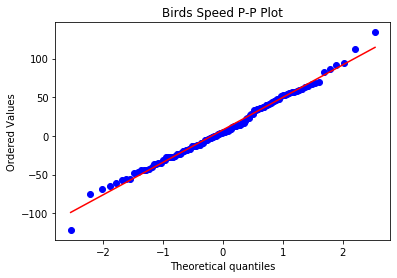

In [44]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(diff, plot= plt)
plt.title('Birds Speed P-P Plot') 
plt.savefig('Birds Speed Residuals.png')

check for normality visually with a p-p plot. the dots should fall on the red line. If the dots are not on the red line then it’s an indication that there is deviation from normality. Some deviations from normality is fine, as long as it’s not severe.The p-p plot shows that the data maintains normality.

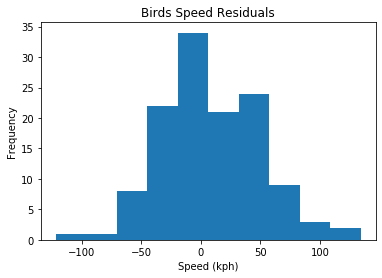

In [45]:
diff.plot(kind= "hist", title= "Birds Speed Residuals")
plt.xlabel("Speed (kph)")
plt.savefig("Residuals Plot of Birds Speed.png")

In [46]:
stats.shapiro(diff)

(0.9928101301193237, 0.7732292413711548)

A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. Since the test statistic does not produce a significant p-value (second variable), the data is indicated to be normally distributed. 

In [47]:
stats.ttest_ind(df_h['Speed'], df_f['Speed'])

Ttest_indResult(statistic=2.157547291402891, pvalue=0.03192374254927676)

In [10]:
descriptives, results = rp.ttest(df_h['Speed'], df_f['Speed'])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Speed,125.0,165.215564,38.949947,3.483789,158.320170,172.110959
1,Speed,125.0,161.268619,25.788722,2.306613,156.703185,165.834053
2,combined,250.0,163.242092,33.024334,2.088642,159.128434,167.355750


In [11]:
results

,Independent t-test,results
0,Difference (Speed - Speed) =,3.9469
1,Degrees of freedom =,248.0000
2,t =,0.9447
3,Two side test p value =,0.3458
4,Difference < 0 p value =,0.8271
5,Difference > 0 p value =,0.1729
6,Cohen's d =,0.1195
7,Hedge's g =,0.1191
8,Glass's delta =,0.1013
9,r =,0.0599
